In [ ]:
import pandas as pd
import numpy as np

from IPython.display import Image, display
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import to_categorical
from keras import layers, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


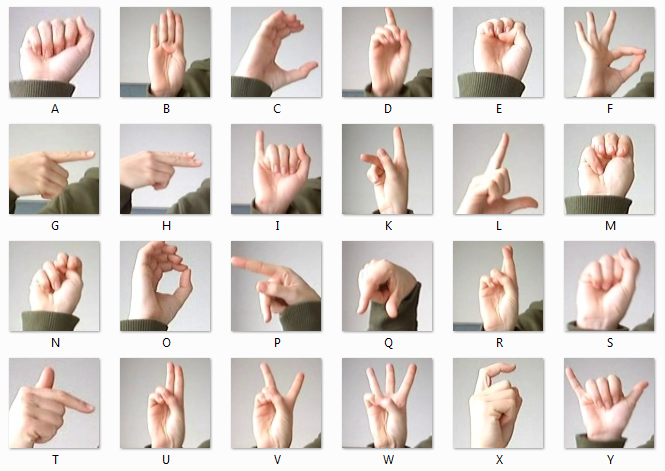

In [ ]:
display(Image(filename = '/content/drive/MyDrive/amer_sign2.png'))

In [ ]:
from google.colab import files
import io
file1 = files.upload()
file2 = files.upload()

In [ ]:
train = pd.read_csv(io.BytesIO(file1["sign_mnist_train.csv"]))
test = pd.read_csv(io.BytesIO(file2["sign_mnist_test.csv"]))

In [ ]:
# Separating images and labels
images, labels = train.iloc[:, 1:], train['label']
testImages, testLabels = test.iloc[:, 1:], test['label']

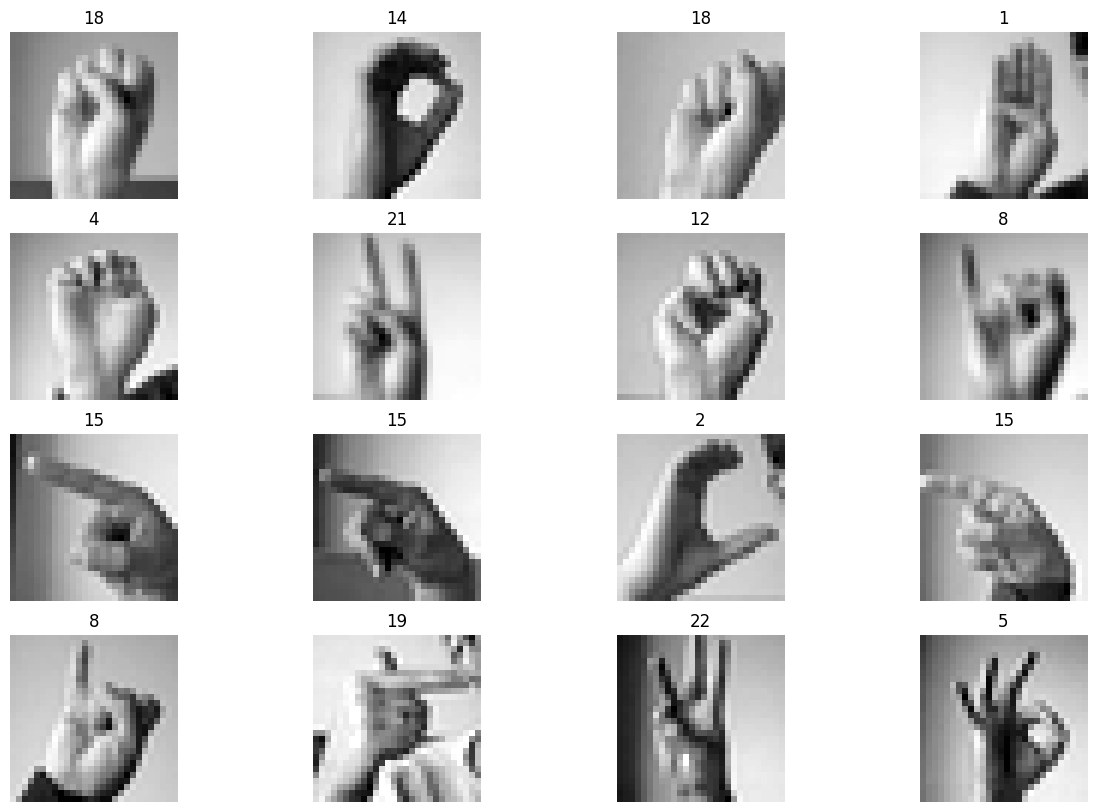

In [ ]:
# Displaying 16 random images
def displayImg(images, title):
    plt.figure(figsize = (15, 10))

    for i in range(len(images)):
        plt.subplot(4, 4, i + 1)
        plt.title(title[i])
        plt.imshow(np.reshape(images[i], (28, 28)), cmap = 'gray')
        plt.axis('off')
    plt.show()

rand = np.random.randint(0, images.shape[0] - 16)
displayImg(images.iloc[rand:rand + 16].values, labels.iloc[rand:rand + 16].values)

In [ ]:
labels = to_categorical(labels, num_classes = 26)
testLabels = to_categorical(testLabels, num_classes = 26)

In [ ]:
# Train-test validation split
trainX, testX, trainY, testY = train_test_split(images, labels, random_state = 30)

In [ ]:
# Reshaping data and scaling it from 0 to 1
trainX, testX, testImages = [data.to_numpy().reshape(-1, 28, 28, 1) / 255 for data in [trainX, testX, testImages]]

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

testDatagen = ImageDataGenerator()

trainGen = datagen.flow(trainX, trainY, batch_size = 128)
validGen = testDatagen.flow(testX, testY, batch_size = 128)
testGen = testDatagen.flow(testImages, testLabels, batch_size = 128)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(26, activation='softmax') #output layer
])

# Defining optimizer, loss, and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 256)               8

In [ ]:
# Adding callback to avoid overfitting
# Halts the training process if the monitored metric stops improving for a certain number of epochs
earlyStopping = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 1e-4,
    patience = 5,
    restore_best_weights = True
)

In [ ]:
# Adding a learning rate annealer
# It reduces the learning rate when the monitored metric stops improving for a certain number of epochs
reduceLR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 3,
    factor = 0.5,
    min_lr = 1e-5
)

In [ ]:
#Training model
history = model.fit(
    trainGen,
    validation_data = validGen,
    epochs = 10,
    callbacks = [earlyStopping, reduceLR],
    workers = 4,
    use_multiprocessing = True
)

Epoch 1/10


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


159/161 [============================>.] - ETA: 0s - loss: 2.2849 - accuracy: 0.3172

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


161/161 [==============================] - 44s 261ms/step - loss: 2.2738 - accuracy: 0.3200 - val_loss: 0.8644 - val_accuracy: 0.7264 - lr: 0.0010
Epoch 2/10
161/161 [==============================] - 42s 258ms/step - loss: 1.0902 - accuracy: 0.6464 - val_loss: 0.3913 - val_accuracy: 0.9053 - lr: 0.0010
Epoch 3/10
161/161 [==============================] - 44s 266ms/step - loss: 0.6933 - accuracy: 0.7679 - val_loss: 0.2411 - val_accuracy: 0.9441 - lr: 0.0010
Epoch 4/10
161/161 [==============================] - 44s 267ms/step - loss: 0.5078 - accuracy: 0.8345 - val_loss: 0.1299 - val_accuracy: 0.9770 - lr: 0.0010
Epoch 5/10
161/161 [==============================] - 44s 271ms/step - loss: 0.3912 - accuracy: 0.8723 - val_loss: 0.0725 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 6/10
161/161 [==============================] - 44s 266ms/step - loss: 0.3078 - accuracy: 0.9025 - val_loss: 0.0510 - val_accuracy: 0.9946 - lr: 0.0010
Epoch 7/10
161/161 [==============================] - 40s 245ms

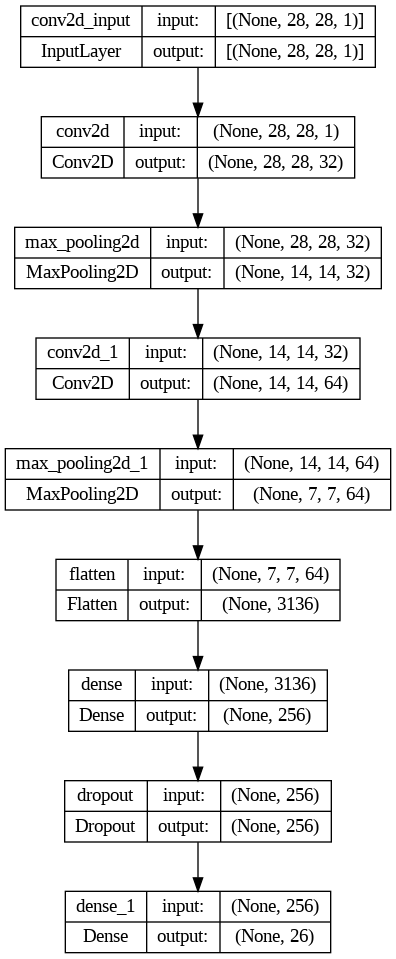

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualizing the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
historyDf = pd.DataFrame(history.history)

<Axes: >

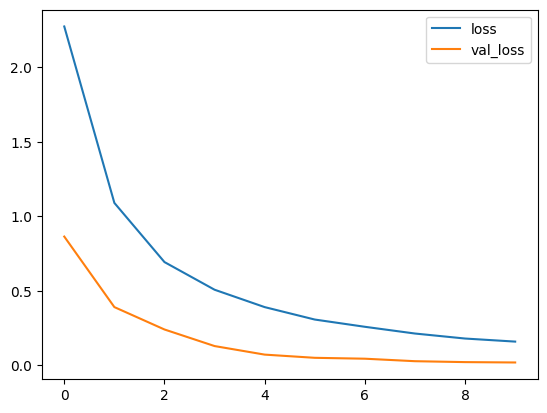

In [ ]:
# Plotting training and validation loss
historyDf.loc[:, ['loss', 'val_loss']].plot()

We can see that the loss and the validation loss deceases as the number of epochs increase. This shows that the model is learning and the issue of overfitting is not occuring.

<Axes: >

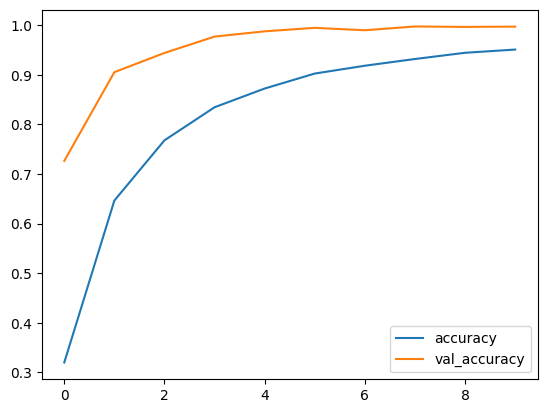

In [ ]:
# Plotting training and validation accuracy
historyDf.loc[:, ['accuracy', 'val_accuracy']].plot()

We can see that the accuracy and the validation accuracy increases as the number of epochs increase. This shows that the model is learning and vanishing gradient does not become a issue when the learning rate slope becomes too small.

In [ ]:
# Finding testing accuracy
testAcc = model.evaluate(testGen)[1] * 100
print(f'Testing accuracy of model : {testAcc:.2f}%')

57/57 [==============================] - 3s 51ms/step - loss: 0.0614 - accuracy: 0.9833
Testing accuracy of model : 98.33%


In [ ]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Adding dropout layer after the first convolutional layer

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(26, activation='softmax') #output layer
])

# Compile the model using the Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [ ]:
# Adding callback to avoid overfitting
earlyStopping = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 1e-4,
    patience = 5,
    restore_best_weights = True
)

In [ ]:
# Adding a learning rate annealer
reduceLR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 3,
    factor = 0.5,
    min_lr = 1e-5
)

In [ ]:
#Training model
history = model.fit(
    trainGen,
    validation_data = validGen,
    epochs = 10,
    callbacks = [earlyStopping, reduceLR],
    workers = 4,
    use_multiprocessing = True
)

Epoch 1/10


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


159/161 [============================>.] - ETA: 0s - loss: 2.6882 - accuracy: 0.1993

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


161/161 [==============================] - 56s 321ms/step - loss: 2.6781 - accuracy: 0.2023 - val_loss: 1.3630 - val_accuracy: 0.6585 - lr: 0.0010
Epoch 2/10
161/161 [==============================] - 45s 273ms/step - loss: 1.4486 - accuracy: 0.5384 - val_loss: 0.5777 - val_accuracy: 0.8389 - lr: 0.0010
Epoch 3/10
161/161 [==============================] - 43s 266ms/step - loss: 0.9280 - accuracy: 0.6961 - val_loss: 0.3121 - val_accuracy: 0.9304 - lr: 0.0010
Epoch 4/10
161/161 [==============================] - 44s 267ms/step - loss: 0.6920 - accuracy: 0.7696 - val_loss: 0.1973 - val_accuracy: 0.9633 - lr: 0.0010
Epoch 5/10
161/161 [==============================] - 44s 267ms/step - loss: 0.5539 - accuracy: 0.8135 - val_loss: 0.1620 - val_accuracy: 0.9607 - lr: 0.0010
Epoch 6/10
161/161 [==============================] - 44s 267ms/step - loss: 0.4621 - accuracy: 0.8442 - val_loss: 0.0960 - val_accuracy: 0.9812 - lr: 0.0010
Epoch 7/10
161/161 [==============================] - 44s 266ms

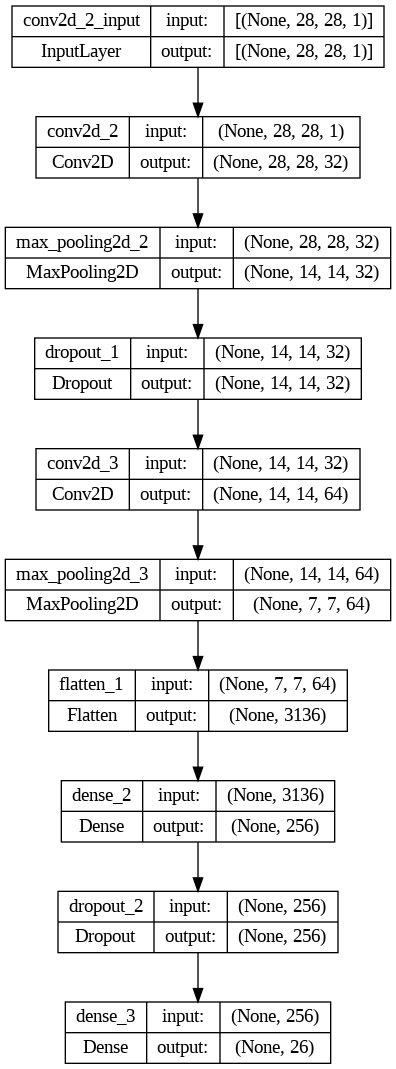

In [ ]:
# Visualizing the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<Axes: >

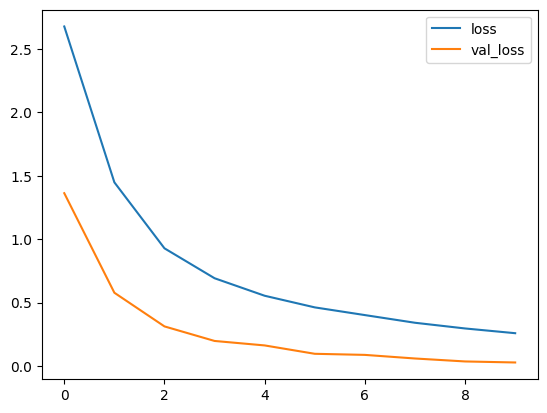

In [ ]:
historyDf = pd.DataFrame(history.history)
# Plotting training and validation loss
historyDf.loc[:, ['loss', 'val_loss']].plot()

<Axes: >

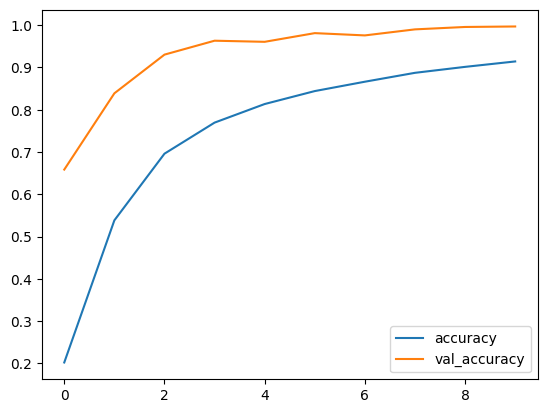

In [ ]:
# Plotting training and validation accuracy
historyDf.loc[:, ['accuracy', 'val_accuracy']].plot()

In [ ]:
# Finding testing accuracy
testAcc = model.evaluate(testGen)[1] * 100
print(f'Testing accuracy of model : {testAcc:.2f}%')

57/57 [==============================] - 2s 43ms/step - loss: 0.0839 - accuracy: 0.9817
Testing accuracy of model : 98.17%


With a dropout rate of 0.3, roughly 30% of the neurons are randomly dropped out during training, meaning that valuable information may be lost. If too much information is discarded, the model's ability to learn and represent complex patterns in the data may be compromised, leading to a decrease in accuracy. Thats why we can say that the initial model without the additional dropout layer functioned better.